<a href="https://colab.research.google.com/github/vivianroca/tarea1/blob/master/proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Descripción general
El proyecto consiste en aplicar los conocimientos aprendidos en clase (y apoyándose de referencias adicionales útiles) para crear modelos predictivos de regresión lineal uni-variable sencillos de la forma:

$$y = f(x) =  mx +b$$

Donde:

y = la variable dependiente
x = variable independiente
m = pendiente de la recta(parámetro del modelo)
b = intercepto(parámetro del modelo)

Tanto “x” como “y” son parte del dataset usado , “m” y “b” son parámetros del modelo los cuales buscamos estimar con los datos, esto significa que se busca encontrar que valores de “m” y “b” producen una recta que describa de la mejor manera posible la relación entre los datos “x” y “y”.


In [0]:
import numpy as np


In [0]:
from sklearn import svm

In [0]:
data = np.load('/content/proyecto_training_data.npy')
data.shape

(1460, 6)

* entrenamiento(80%)
* validación y pruebas(20%)

In [0]:

##data = data[np.logical_not(np.isnan(data))]

x = data.shape
print(x)
och =  int(x[0]*(0.80))
fin = int(x[0])

train = data[ 0 : och]
test  = data[ och + 1 : fin ]
## print(type(train))
## print(train)
## print(test)



(1460, 6)


**Descripcion de las variables**

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.


* OverallQual: Overall material and finish quality, rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
       
       
* 1stFlrSF: First Floor square feet
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* YearBuilt: Original construction date
* LotFrontage: Linear feet of street connected to property


In [0]:
sp = train[:, 0]  ##SalePrice
oq = train[:, 1]  ##OverallQual
ff = train[:, 2]  ##1stFlrSF
tr = train[:, 3]  ##TotRmsAbvGrd
yb = train[:, 4]  ##YearBuilt
lf = train[:, 5]  ##LotFrontage

* media
* valor máximo
* valor mínimo 
* rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
* desviación estándar 


In [0]:
##SalePrice
medi_sp = np.median(sp)
maxi_sp = np.max(sp)
minn_sp = np.min(sp)
peak_sp = np.ptp(sp)
desv_sp = np.std(sp)

##OverallQual
medi_oq = np.median(oq)
maxi_oq = np.max(oq)
minn_oq = np.min(oq)
peak_oq = np.ptp(oq)
desv_oq = np.std(oq)


##1stFlrSF
medi_ff = np.median(ff)
maxi_ff = np.max(ff)
minn_ff = np.min(ff)
peak_ff = np.ptp(ff)
desv_ff = np.std(ff)


##TotRmsAbvGrd
medi_tr = np.median(tr)
maxi_tr = np.max(tr)
minn_tr = np.min(tr)
peak_tr = np.ptp(tr)
desv_tr = np.std(tr)

##YearBuilt
medi_yb = np.median(yb)
maxi_yb = np.max(yb)
minn_yb = np.min(yb)
peak_yb = np.ptp(yb)
desv_yb = np.std(yb)


##LotFrontage
medi_lf = np.median(lf)
maxi_lf = np.max(lf)
minn_lf = np.min(lf)
peak_lf = np.ptp(lf)
desv_lf = np.std(lf)



Para cada variable en el dataset usar seaborn(función distplot 

In [0]:
import seaborn as sns
sns.set()

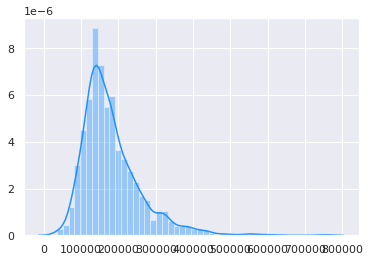

In [0]:
sns.distplot(sp, color="dodgerblue");

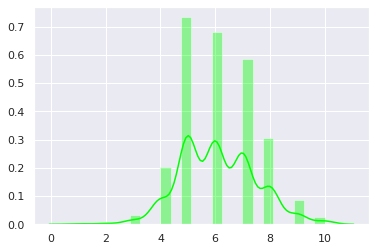

In [0]:
sns.distplot(oq, color="lime");

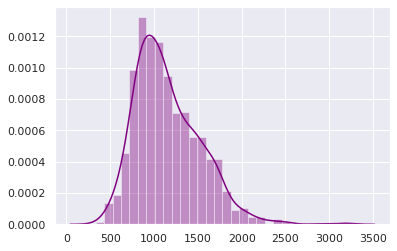

In [0]:
sns.distplot(ff, color="purple");

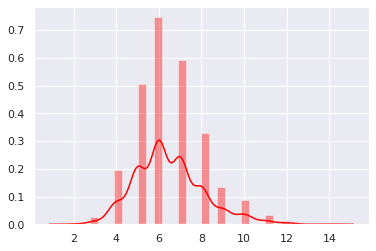

In [0]:
sns.distplot(tr, color="red");


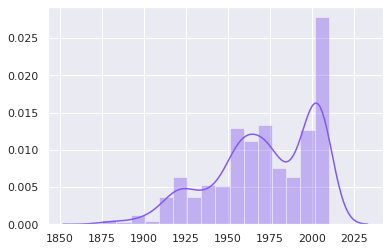

In [0]:
sns.distplot(yb, color="#835AF1");

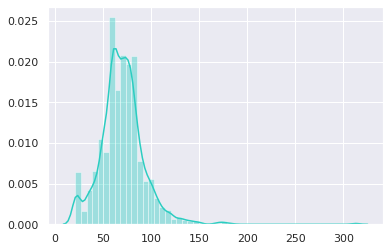

In [0]:
sns.distplot(lf, color = "#2BCDC1");

Calcular el coeficiente de correlación entre x y y


In [0]:
## x = 
## sp SalePrice
## y = 
## oq OverallQual
## ff 1stFlrSF
## tr TotRmsAbvGrd
## yb YearBuilt
## lf LotFrontage

In [0]:
corr_oq = np.corrcoef(sp, oq)
corr_ff = np.corrcoef(sp, ff)
corr_tr = np.corrcoef(sp, tr)
corr_yb = np.corrcoef(sp, yb)
corr_lf = np.corrcoef(sp, lf)



In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

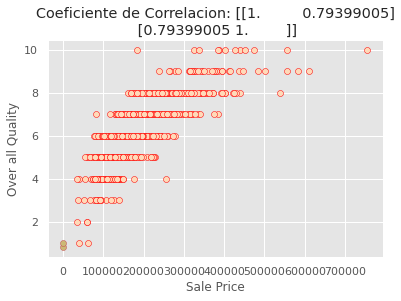

In [0]:
## oq OverallQual
plt.scatter(sp, oq, color='peachpuff', marker='o' ,  edgecolors='red')
plt.scatter(corr_oq[0], corr_oq[1], color='y', marker='o',  edgecolors='r')

plt.title("Coeficiente de Correlacion: " + str(corr_oq))
plt.xlabel("Sale Price")
plt.ylabel("Over all Quality");

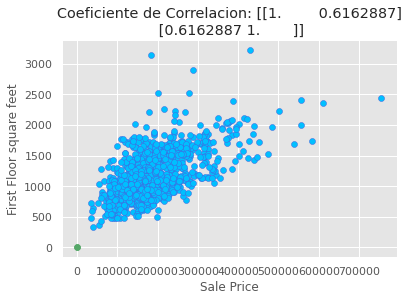

In [0]:
## ff 1stFlrSF
plt.scatter(sp, ff, color='deepskyblue', marker='o',  edgecolors='royalblue' )
plt.scatter(corr_ff[0], corr_ff[1], color='g', marker='o' )

plt.title("Coeficiente de Correlacion: " + str(corr_ff))
plt.xlabel("Sale Price")
plt.ylabel("First Floor square feet");

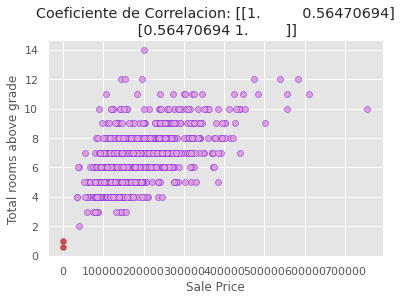

In [0]:
##TotRmsAbvGrd
plt.scatter(sp, tr, color='plum', marker='o',  edgecolors='blueviolet' )
plt.scatter(corr_tr[0], corr_tr[1], color='r', marker='o' )

plt.title("Coeficiente de Correlacion: " + str(corr_tr))
plt.xlabel("Sale Price")
plt.ylabel("Total rooms above grade");

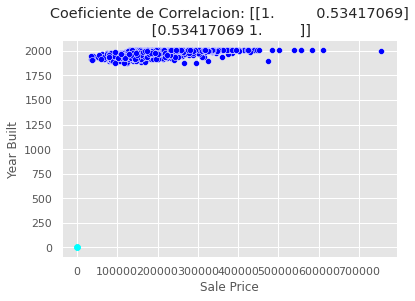

In [0]:
##YearBuilt
plt.scatter(sp, yb, color='blue', marker='o',  edgecolors='white' )
plt.scatter(corr_yb[0], corr_yb[1], color='cyan', marker='o' )

plt.title("Coeficiente de Correlacion: " + str(corr_yb))
plt.xlabel("Sale Price")
plt.ylabel("Year Built");

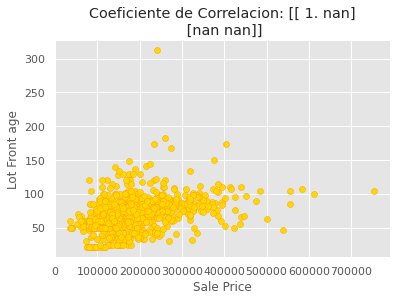

In [0]:
##LotFrontage
plt.scatter(sp, lf, color='gold', marker='o',  edgecolors='orange' )
plt.scatter(corr_lf[0], corr_lf[1], color='cyan', marker='o' )

plt.title("Coeficiente de Correlacion: " + str(corr_lf))
plt.xlabel("Sale Price")
plt.ylabel("Lot Front age"); 

Basado en la gráfica y el coeficiente de correlación  de cada par x,y elegir  las 2 variables con más potencial predictivo(la 2 que presentan mayor correlación).

**OverallQual (oq):** 
Overall material and finish quality, rates the overall material and finish of the house

**1stFlrSF (ff):**
First Floor square feet

In [0]:
sp.size
 

1168

In [0]:
def entrenar_lineal(x):
  unos = np.ones(x.size, dtype=int)
  df1 = pd.DataFrame({'ar1':unos})
  df2 = pd.DataFrame({'ar2':unos})
  matriz_x = pd.concat([df1.ar1, df2.ar2], axis = 0)

  print(x)
  print(matriz_x)
 
entrenar_lineal(sp)

[208500. 181500. 223500. ... 233170. 245350. 173000.]
0       1
1       1
2       1
3       1
4       1
       ..
1163    1
1164    1
1165    1
1166    1
1167    1
Length: 2336, dtype: int64


In [0]:

import numpy as np
import pandas as pd
np_ar1 = np.array([1.3, 1.4, 1.5])
np_ar2 = np.array(['name1', 'name2', 'name3'])
df1 = pd.DataFrame({'ar1':np_ar1})
df2 = pd.DataFrame({'ar2':np_ar2})
pd.concat([df1.ar1, df2.ar2], axis=0)

0      1.3
1      1.4
2      1.5
0    name1
1    name2
2    name3
dtype: object

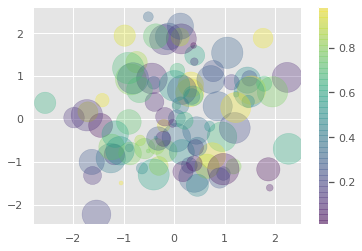

In [0]:
, y, epochs, imp_err_cada,lr